## Negativos de imagem

In [100]:
import numpy as np # biblioteca eficiente para operações matriciais
import matplotlib.pyplot as plt # plotar imagens e gráficos
import cv2 # varios recursos para processamento de imagem

In [101]:
# g(x,y) = 255 - f(x,y)
# Primeiro canal R, segundo o G,terceiro B (RGB)
img = plt.imread("Área de Trabalho/IDI/animais.jpeg") #"Área de Trabalho/IDI/animais.jpeg"
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(667, 1200, 3)


In [102]:
#Primeiro canal B, segundo G, terceiro R
img_cv2 = cv2.imread("Área de Trabalho/IDI/animais.jpeg") # adicionar isso para uma imagem na escala preto e branco: <, cv2.IMREAD_GRAYSCALE>
print(type(img_cv2))
print(img_cv2.dtype)
print(img_cv2.shape)

<class 'numpy.ndarray'>
uint8
(667, 1200, 3)


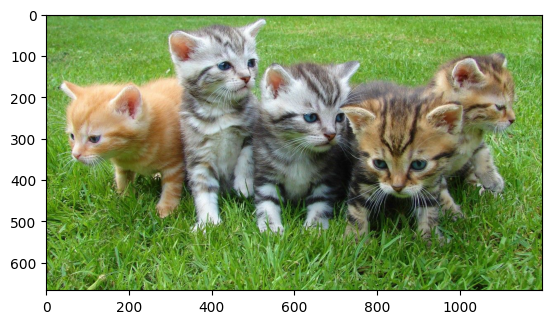

In [103]:
#plt.imshow(img)
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv2) # sem conversão, a imagem fica diferente
plt.show()

In [104]:
neg = 255 - img # a imagem de saida 255 - valor de entrada (basicamente a imagem negativa)

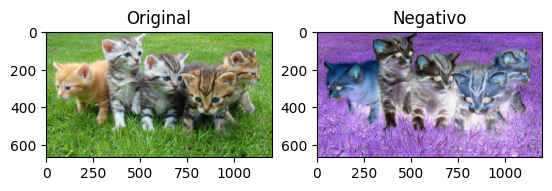

In [105]:
fig, axes = plt.subplots(1,2)
axes[0].set_title("Original")

axes[0].imshow(img, cmap="gray")
axes[1].set_title("Negativo")
axes[1].imshow(neg, cmap="gray")
plt.show()

## Ajuste de brilho

In [106]:
img = plt.imread("Área de Trabalho/IDI/raiox.jpeg")
print(img.dtype)

uint8


In [107]:
def ajustaBrilho(img, cte):
    img = img.astype(np.float32)
    img += cte
    img[img > 255] = 255
    img[img < 0] = 0
    return img.astype(np.uint8)

In [108]:
img_mais_brilho = ajustaBrilho(img, 80)
img_menos_brilho = ajustaBrilho(img, -80)


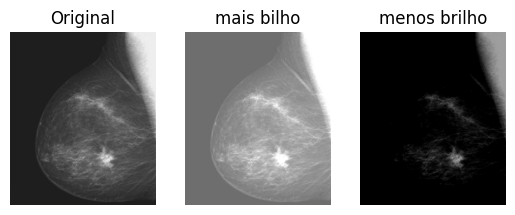

In [109]:
fig, axes = plt.subplots(1,3)
axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")
axes[0].set_title("Original")
axes[0].imshow(img, cmap="gray")
axes[0].imshow(img)
axes[1].set_title("mais bilho")
axes[1].imshow(img, cmap="gray")
axes[1].imshow(img_mais_brilho)
axes[2].set_title("menos brilho")
axes[2].imshow(img, cmap="gray")
axes[2].imshow(img_menos_brilho)
plt.show()

## AJuste de brilho RGB

In [110]:
img = plt.imread("Área de Trabalho/IDI/animais.jpeg")
print(img.dtype)
print(img.shape)

uint8
(667, 1200, 3)


In [111]:
def ajustaBrilho1(img, cte):
    img = img.astype(np.float32)
    img += cte
    img[img > 255] = 255
    img[img < 0] = 0
    return img.astype(np.uint8)

def ajustaBrilho2(img, cte):
    img = img.astype(np.float32)
    img *= cte
    img[img > 255] = 255
    return img.astype(np.uint8)

In [112]:
img_mais_brilho = ajustaBrilho2(img, 1.2)
img_menos_brilho = ajustaBrilho2(img, 0.8)

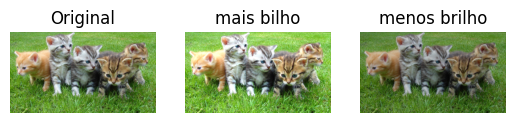

In [113]:
fig, axes = plt.subplots(1,3)
axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")
axes[0].set_title("Original")
axes[0].imshow(img, cmap="gray")
axes[0].imshow(img)
axes[1].set_title("mais bilho")
axes[1].imshow(img, cmap="gray")
axes[1].imshow(img_mais_brilho)
axes[2].set_title("menos brilho")
axes[2].imshow(img, cmap="gray")
axes[2].imshow(img_menos_brilho)
plt.show()

## Correção de contraste

In [114]:
img = plt.imread("Área de Trabalho/IDI/aeroporto.jpeg")

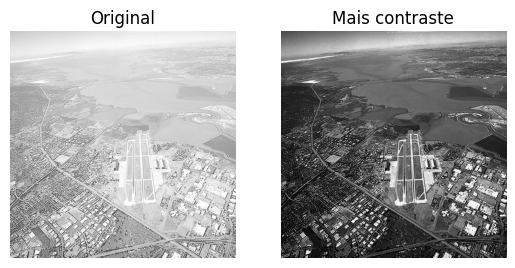

In [115]:
def ajustaContraste1(img):
    out = img.astype(np.float32)
    out = np.log(1.0 + out) * (255.0 / np.log(256)) #np faz um broadcast
    return out.astype(np.uint8)

def ajustaContraste2(img):
    out = img.astype(np.float64)
    out = np.exp(out) ** (np.log(256)/255.0) - 1 #np faz um broadcast
    return out.astype(np.uint8)

img_mais_contraste = ajustaContraste2(img)
#img_menos_contraste = ajus


fig, axes = plt.subplots(1,2)
axes[0].axis("off")
axes[1].axis("off")
#axes[2].axis("off")
axes[0].set_title("Original")
axes[0].imshow(img, cmap="gray")
axes[0].imshow(img)
axes[1].set_title("Mais contraste")
axes[1].imshow(img, cmap="gray")
axes[1].imshow(img_mais_contraste)
#axes[2].set_title("Menos contraste")
#axes[2].imshow(img, cmap="gray")
#axes[2].imshow(img_menos_contraste)
plt.show()

## Contraste Exponencial

## Correção de gama

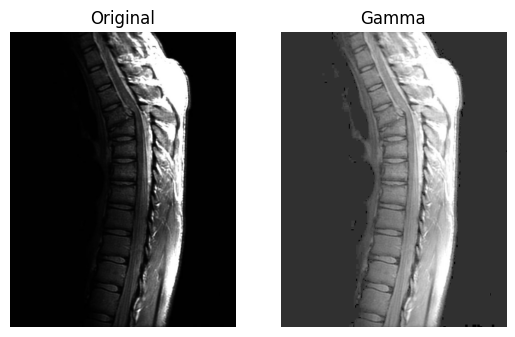

In [116]:
def gamma_transform(img, gamma):
    c = 255.0 / (255.0**gamma)
    img_gamma = c*(img.astype(np.float32)) ** gamma
    return img_gamma.astype(np.uint8)

if __name__ == '__main__':
    img = plt.imread("Downloads/fratura.jpeg")
    img_gamma = gamma_transform(img, 0.3)

fig, axes = plt.subplots(1,2)
axes[0].axis("off")
axes[1].axis("off")
#axes[2].axis("off")
axes[0].set_title("Original")
axes[0].imshow(img, cmap="gray")
axes[0].imshow(img)
axes[1].set_title("Gamma")
axes[1].imshow(img, cmap="gray")
axes[1].imshow(img_gamma)
plt.show()

## Tranformação linear por partes

In [117]:
img = plt.imread("Downloads/polen.jpeg")

def transformacao(img):
    rmax = np.max(img)
    rmin = np.min(img)
    
    a = 255/(rmax - rmin)
    b = 0 -(a*rmax)

    img_out = a*(img.astype(np.float32)) + b
    return img_out.astype(np.uint8)


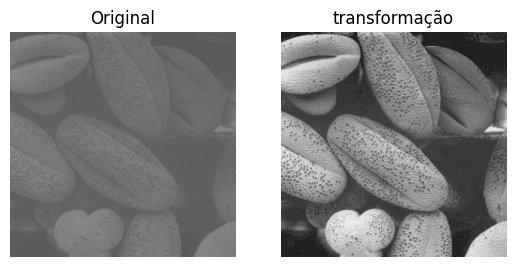

In [118]:
img_transformada = transformacao(img)

fig, axes = plt.subplots(1,2)
axes[0].axis("off")
axes[1].axis("off")
#axes[2].axis("off")
axes[0].set_title("Original")
axes[0].imshow(img, cmap="gray")
axes[0].imshow(img)
axes[1].set_title("transformação")
axes[1].imshow(img, cmap="gray")
axes[1].imshow(img_transformada)
plt.show()

## Correções Tonais

## Limiarização de Intensidade

In [119]:
def limiariza(img, a, b):
    img_th = np.zeros(img.shape,dtype=np.uint8)
    img_th[(img > a) & (img < b)] = 255
    return img_th

if __name__ == '__main__':
    img = plt.imread("Downloads/polen.jpeg")
    img_out = limiariza(img,110, 150)


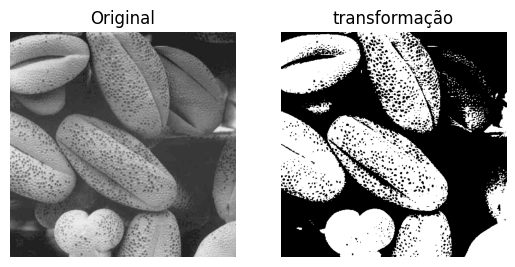

In [120]:

fig, axes = plt.subplots(1,2)
axes[0].axis("off")
axes[1].axis("off")
axes[0].set_title("Original")
axes[0].imshow(img, cmap="gray")
axes[0].imshow(img_transformada)
axes[1].set_title("transformação")
axes[1].imshow(img, cmap="gray")
axes[1].imshow(img_out)
plt.show()

## Limiarização de imagens coloridas

## Equalização Histograma

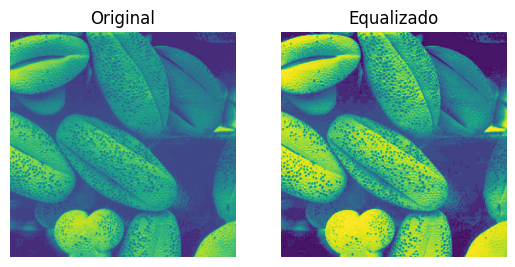

In [123]:
if __name__ == '__main__':
    img = cv2.imread("Downloads/polen.jpeg", cv2.IMREAD_GRAYSCALE)
    R, C = img.shape # recupera o numero de linhas e colunas da imagem

    # Calculo do histograma normalizado (pr)
    hist =cv2.calcHist([img], [0], None, [256], [0,256]) 
    #print(hist)
    pr = hist/(R*C)

    #Cummulative distribution function (CDF)
    cdf = pr.cumsum()
    sk = 255 *cdf
    sk = np.round(sk)

    #criar imagem de saida
    img_out= np.zeros(img.shape, dtype=np.uint8)
    for i in range(256):
        img_out[img == i] = sk[i]

    
        
    fig, axes = plt.subplots(1,2)
    axes[0].axis("off")
    axes[1].axis("off")
    axes[0].set_title("Original")
    axes[0].imshow(img, cmap="grey")
    axes[0].imshow(img)
    axes[1].set_title("Equalizado")
    axes[1].imshow(img_out,cmap="grey")
    axes[1].imshow(img_out)
    plt.show()